In [1]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from IPython.display import display, HTML

3 Країни згідно мого варіанту (4 - Жигамовський Нікіта)

In [98]:
names_countries = pd.read_csv('../tasks.csv', header=0, names=['Країна 1', 'Країна 2', 'Країна 3'])
names_countries

,Країна 1,Країна 2,Країна 3
Аніщенко Ігор,Lithuania,Niger,United Kingdom
Димов Максим,Belarus,Honduras,Curacao
Єрмоленко Назар,Chile,New Zealand,Netherlands
Жигамовський Нікіта,South Sudan,Mexico,China
Кравченко Тетяна,Spain,Bangladesh,Iceland
Марченко Ігор,Bahrain,Belarus,Ukraine
Нестеров Олег,Suriname,Austria,Uruguay
Пороскун Олена,Bermuda,France,Panama
Прокопенко Микита,Ethiopia,Cyprus,Equatorial Guinea
Самілик Антон,Nicaragua,British Virgin Islands,Sierra Leone


In [6]:
names_countries = names_countries.loc['Жигамовський Нікіта']
filter_country = names_countries.values
filter_country = [f for f in filter_country]
filter_country

['South Sudan', 'Mexico', 'China']

### Task 1 Популяція за інтервал часу 1960-2020

In [7]:
print(os.listdir('../src/population'))

['population.csv', 'population.json', 'population_pandas.xlsx']


Дані щодо всіх країн

In [99]:
data_population = pd.read_csv('../src/population/population.csv')
data_population

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760
...,...,...,...,...
15404,Zimbabwe,ZWE,2014,13586681
15405,Zimbabwe,ZWE,2015,13814629
15406,Zimbabwe,ZWE,2016,14030390
15407,Zimbabwe,ZWE,2017,14236745


Дані щодо країн мого варіанту

In [10]:
data_population_filtered = data_population.query('`Country Name` in @filter_country')
data_population_filtered

,Country Name,Country Code,Year,Value
5133,China,CHN,1960,667070000
5134,China,CHN,1961,660330000
5135,China,CHN,1962,665770000
5136,China,CHN,1963,682335000
5137,China,CHN,1964,698355000
...,...,...,...,...
13192,South Sudan,SSD,2014,10554883
13193,South Sudan,SSD,2015,10715658
13194,South Sudan,SSD,2016,10832512
13195,South Sudan,SSD,2017,10910759


In [11]:
data_population_filtered['Country Name'].unique()

array(['China', 'Mexico', 'South Sudan'], dtype=object)

In [15]:
data_population_filtered.describe()

,Year,Value
count,177.000000,1.770000e+02
mean,1989.000000,3.900500e+08
std,17.077697,5.098511e+08
min,1960.000000,2.842724e+06
25%,1974.000000,7.213351e+06
50%,1989.000000,8.236893e+07
75%,2004.000000,9.003500e+08
max,2018.000000,1.392730e+09


Ще один варіант вибірки 

In [101]:
cust_filter = 1960
cust_filter2 = 2020
data_population_1960_2020 = data_population.query('(Year >= @cust_filter | Year <= @cust_filter2) & `Country Name` in @filter_country')
data_population_1960_2020

,Country Name,Country Code,Year,Value
5133,China,CHN,1960,667070000
5134,China,CHN,1961,660330000
5135,China,CHN,1962,665770000
5136,China,CHN,1963,682335000
5137,China,CHN,1964,698355000
...,...,...,...,...
13192,South Sudan,SSD,2014,10554883
13193,South Sudan,SSD,2015,10715658
13194,South Sudan,SSD,2016,10832512
13195,South Sudan,SSD,2017,10910759


In [20]:
data_population_filtered.equals(data_population_1960_2020)

True

In [21]:
if not os.path.exists('./tables_and_graphs'):
    os.mkdir('./tables_and_graphs')

In [103]:
data_population_1960_2020.to_csv("./tables_and_graphs/data_population_1960_2020.csv", index=False)
data_population_1960_2020.to_excel("./tables_and_graphs/data_population_1960_2020.xlsx", sheet_name="Sheet1", index=False)
data_population_1960_2020.to_json(path_or_buf="./tables_and_graphs/data_population_1960_2020.json", orient="split")

1. #### Лінійний графік

*1.1 Лінійний графік популяції 3 країн відповідно до року.*

In [104]:
def fun_xy_plot(dataframe, country):
    df1 = dataframe.query('`Country Name` == @country')
    data = df1[['Year', 'Value']].values.tolist()
    x = np.zeros((len(data), 1))
    y = np.zeros((len(data), 1))
    for i in range(len(data)):
        x[i] = data[i][0]
        y[i] = data[i][1]     
    
    return country, x, y

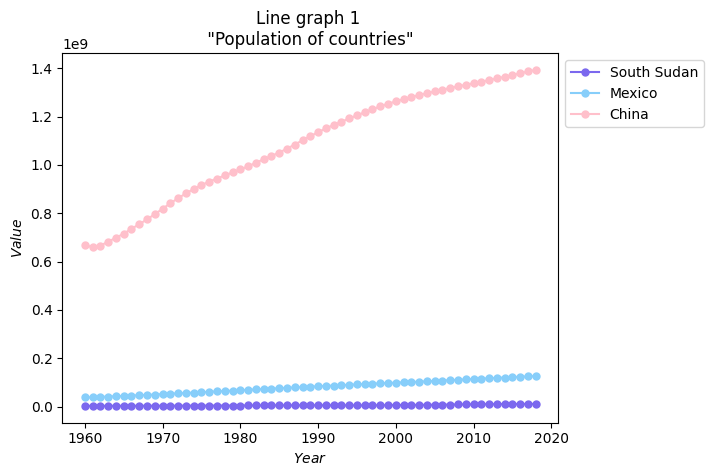

In [105]:
def plot_line1(dateframe, filter_country):
    colors = ['mediumslateblue', 'lightskyblue', 'pink']
    
    if type(filter_country) == str:
        columns = 1
        country, x, y = fun_xy_plot(dateframe, filter_country) 
        plt.plot(x, y, color=colors[0], label=f'{country}', marker=".", markersize=10)
    else:
        columns = len(filter_country)
        for i in range(columns):
            country, x, y = fun_xy_plot(dateframe, filter_country[i]) 
            plt.plot(x, y, color=colors[i], label=f'{country}', marker=".", markersize=10)
        
    plt.title('Line graph 1 \n "Population of countries" ')
    plt.ylabel('$ Value $')
    plt.xlabel('$ Year $')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    
    plt.savefig('./tables_and_graphs/line1_population.png', bbox_inches='tight')
    
plot_line1(data_population_1960_2020, filter_country)

*1.2 Лінійний графік популяції 3 країн сумарно по країнам.*

In [27]:
df = data_population_1960_2020
grouped_df = df.groupby('Country Name')['Value'].sum()
top = grouped_df.sort_values(ascending=True)
top

Country Name
South Sudan      343950195
Mexico          4820436994
China          63874465000
Name: Value, dtype: int64

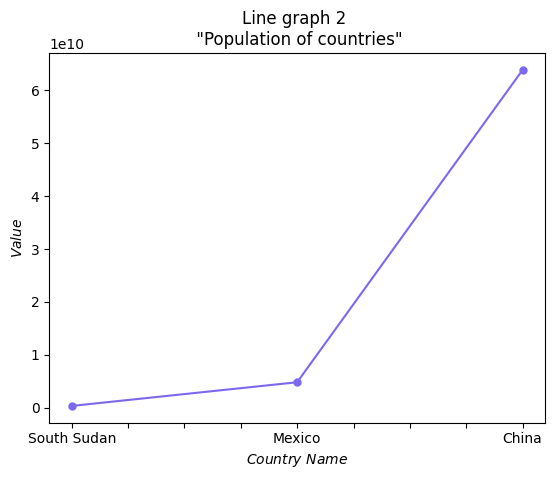

In [106]:
def plot_line2(data):
    fig, ax = plt.subplots()
    top = data
    res = top.plot(x="Year", y="Value", color="mediumslateblue", ylabel='Value', marker=".", markersize=10).get_figure()

    plt.title('Line graph 2 \n "Population of countries"')
    plt.ylabel('$ Value $')
    plt.xlabel('$ Country \ Name $')
    res.savefig('./tables_and_graphs/line2_population.pdf', bbox_inches='tight')
    res.savefig('./tables_and_graphs/line2_population.png', bbox_inches='tight')
    res.savefig('./tables_and_graphs/line2_population.jpg', bbox_inches='tight')
    
plot_line2(top)  

2. #### Кругова діаграма 

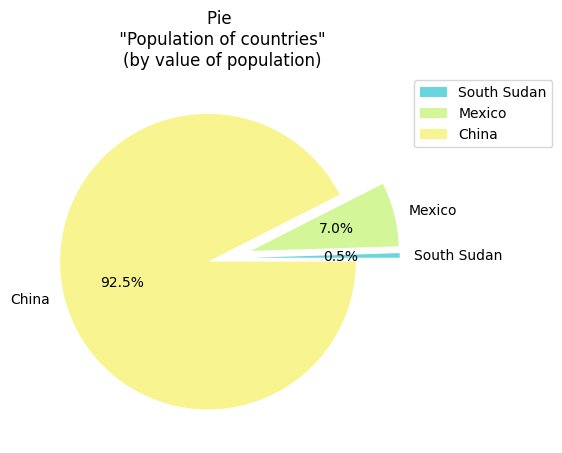

In [107]:
def plot_pie(data):
    if len(data) > 3:
        list_exp = [0.05 for i in range(len(data))] 
    else:
        list_exp = [0.2, 0.2, 0.1]
        
    explode = tuple(list_exp)
    colors = [
        [0.41062479, 0.8407867,  0.87001545], 
        [0.82670165, 0.96549147, 0.59721125], 
        [0.9737108,  0.96112498, 0.56562821] 
    ]
    res = data.plot(kind='pie', y = 'Value', autopct='%1.1f%%', explode=explode, ylabel = '',colors = colors, shadow=False).get_figure()
    plt.title('Pie \n "Population of countries" \n(by value of population)')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    res.savefig('./tables_and_graphs/pie_population.png', bbox_inches='tight')

plot_pie(top)

3. #### Стовпчаста діаграма

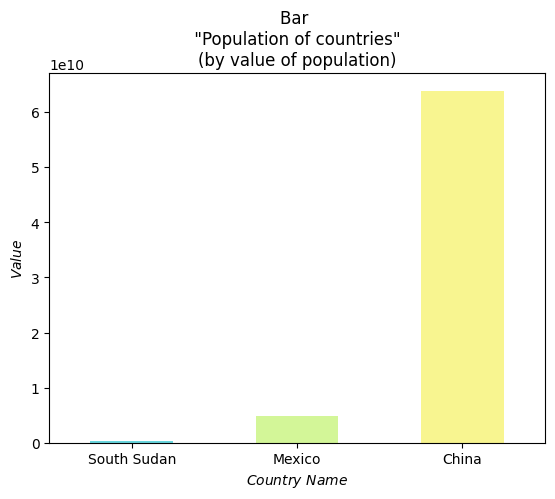

In [108]:
def plot_bar(data): 
    fig, ax = plt.subplots()
    count = len(data)
    colors = [
        [0.41062479, 0.8407867,  0.87001545],
        [0.82670165, 0.96549147, 0.59721125],
        [0.9737108,  0.96112498, 0.56562821]
    ]
    res = top.plot(kind = 'bar', x="Country Name", y="Value", label="Value", color = colors).get_figure()
    ax.tick_params(axis='x', labelrotation=0)
    plt.title('Bar \n "Population of countries" \n(by value of population)')
    plt.ylabel('$Value$')
    plt.xlabel('$Country \ Name$')
    res.savefig('./tables_and_graphs/bar_population.png', bbox_inches='tight')

plot_bar(top)

### Task 2 Показати в табличному вигляді основні стаститичні величини: min, max, mean, квантіли 25%, 75%, 95%.

2. #### Розглянемо таблицю **population.csv**.

In [111]:
data_population = pd.read_csv('../src/population/population.csv')
data_population_filtered = data_population.query(' `Country Name` in @filter_country ')
data_population_filtered['Country Name'].unique()

array(['China', 'Mexico', 'South Sudan'], dtype=object)

In [112]:
statistics_population = data_population_filtered.describe()
display(statistics_population)

,Year,Value
count,177.000000,1.770000e+02
mean,1989.000000,3.900500e+08
std,17.077697,5.098511e+08
min,1960.000000,2.842724e+06
25%,1974.000000,7.213351e+06
50%,1989.000000,8.236893e+07
75%,2004.000000,9.003500e+08
max,2018.000000,1.392730e+09


In [37]:
data_quantile = pd.DataFrame(np.zeros((3,2)), columns = ['Year', 'Value'], index = ['25%', '75%', '95%'])

for j in ['Year', 'Value']:
    if j == 'Year':
        data = data_population_filtered['Year']
    else:
        data = data_population_filtered['Value']
        
    data_quantile[j][0] = np.quantile(data, .25)
    data_quantile[j][1] = np.quantile(data, .75)
    data_quantile[j][2] = np.quantile(data, .95)
    
data_quantile

,Year,Value
25%,1974.0,7.213351e+06
75%,2004.0,9.003500e+08
95%,2015.2,1.332549e+09


In [38]:
data_quantile = data_quantile.drop(['25%', '75%'])
statistics_population = pd.concat([statistics_population, data_quantile], ignore_index=False)
display(statistics_population)

,Year,Value
count,177.000000,1.770000e+02
mean,1989.000000,3.900500e+08
std,17.077697,5.098511e+08
min,1960.000000,2.842724e+06
25%,1974.000000,7.213351e+06
50%,1989.000000,8.236893e+07
75%,2004.000000,9.003500e+08
max,2018.000000,1.392730e+09
95%,2015.200000,1.332549e+09


In [116]:
statistics_population.to_csv("./tables_and_graphs/statistics_population.csv", index = True)
statistics_population.to_excel("./tables_and_graphs/statistics_population.xlsx", sheet_name="Sheet1", index=False)
statistics_population.to_json(path_or_buf="./tables_and_graphs/statistics_population.json", orient="split")

2. #### Розглянемо таблицю **ppp-gdp.csv**.

In [118]:
data_ppp = pd.read_csv('../src/ppp/ppp-gdp.csv')
data_ppp_filtered = data_ppp.query(' `Country` in @filter_country ')
data_ppp_filtered['Country'].unique()

array(['South Sudan', 'China', 'Mexico'], dtype=object)

In [119]:
statistics_ppp = data_ppp_filtered.describe()
statistics_ppp

,Year,PPP
count,72.000000,72.000000
mean,2006.166667,4.417867
std,9.002347,2.516201
min,1990.000000,1.049935
25%,1998.750000,2.703851
50%,2007.500000,3.542718
75%,2013.250000,6.730064
max,2021.000000,10.043314


In [121]:
data_quantile = pd.DataFrame(np.zeros((3,2)), columns = ['Year', 'PPP'], index = ['25%', '75%', '95%'])
for j in ['Year', 'PPP']:
    if j == 'Year':
        data = data_ppp_filtered['Year']
    else:
        data = data_ppp_filtered['PPP']
        
    data_quantile[j][0] = np.quantile(data, .25)
    data_quantile[j][1] = np.quantile(data, .75)
    data_quantile[j][2] = np.quantile(data, .95)
    
data_quantile

,Year,PPP
25%,1998.75,2.703851
75%,2013.25,6.730064
95%,2019.45,9.076817


In [122]:
data_quantile = data_quantile.drop(['25%', '75%'])
statistics_ppp = pd.concat([statistics_ppp, data_quantile], ignore_index=False)
display(statistics_ppp)

,Year,PPP
count,72.000000,72.000000
mean,2006.166667,4.417867
std,9.002347,2.516201
min,1990.000000,1.049935
25%,1998.750000,2.703851
50%,2007.500000,3.542718
75%,2013.250000,6.730064
max,2021.000000,10.043314
95%,2019.450000,9.076817


In [123]:
statistics_ppp.to_csv("./tables_and_graphs/statistics_ppp.csv", index = True)
statistics_ppp.to_excel("./tables_and_graphs/statistics_ppp.xlsx", sheet_name="Sheet1", index=False)
statistics_ppp.to_json(path_or_buf="./tables_and_graphs/statistics_ppp.json", orient="split")

3. #### Розглянемо таблиці в **/oil-prices**.

In [47]:
files_oil = os.listdir('../src/oil-prices')
files_oil_csv = [file for file in files_oil if '.csv' in file]
files_oil_csv                 

['brent-daily.csv',
 'brent-monthly.csv',
 'brent-weekly.csv',
 'brent-year.csv',
 'wti-daily.csv',
 'wti-monthly.csv',
 'wti-weekly.csv',
 'wti-year.csv']

Тут є 2 марки нафти 'wti' та 'brent'.

**3.1 Перший варіант вибірки**

In [125]:
def concat_files_oil(files_oil_csv):
    for i in range(len(files_oil_csv)):
        join_path = os.path.join('../src/oil-prices', files_oil_csv[i])
        df_oil = pd.read_csv(join_path)

        if i == 0:
            result = df_oil.copy(deep=True)
        else:
            result = pd.concat([result, df_oil], ignore_index=True)
    print("The concatenation process in folder '{}' is complete.".format('../src/oil-prices'))  
    return result

In [127]:
data_oil = concat_files_oil(files_oil_csv)
grouped_df = data_oil.groupby('Date')['Price'].sum()

sort_grouped_df = grouped_df.sort_values(ascending=True)
sort_grouped_df = pd.DataFrame(data=sort_grouped_df)
statistics_oil = sort_grouped_df.describe()
statistics_oil

The concatenation process in folder '../src/oil-prices' is complete.


,Price
count,9691.000000
mean,113.196581
std,91.661473
min,-19.620000
25%,40.705000
50%,85.120000
75%,154.640000
max,697.910000


In [52]:
data_quantile = pd.DataFrame(np.zeros((3,1)), columns = ['Price'], index = ['25%', '75%', '95%'])

for j in ['Price']:
    data = sort_grouped_df
    data_quantile[j][0] = np.quantile(data, .25)
    data_quantile[j][1] = np.quantile(data, .75)
    data_quantile[j][2] = np.quantile(data, .95)
    
data_quantile

,Price
25%,40.705
75%,154.640
95%,290.100


In [53]:
data_quantile = data_quantile.drop(['25%', '75%'])
statistics_oil = pd.concat([statistics_oil, data_quantile], ignore_index=False)
display(statistics_oil)

,Price
count,9691.000000
mean,113.196581
std,91.661473
min,-19.620000
25%,40.705000
50%,85.120000
75%,154.640000
max,697.910000
95%,290.100000


In [128]:
statistics_oil.to_csv("./tables_and_graphs/statistics_oil.csv", index = True)
statistics_oil.to_excel("./tables_and_graphs/statistics_oil.xlsx", sheet_name="Sheet1", index=False)
statistics_oil.to_json(path_or_buf="./tables_and_graphs/statistics_oil.json", orient="split")

**3.2 Інший варіант вибірки.**

In [129]:
print("Let's describe the data from each file in folder '../src/oil-prices'.\n")
for i in range(len(files_oil_csv)):
    join_path = os.path.join('../src/oil-prices', files_oil_csv[i])
    print('#', i+1, join_path)
    
    df_oil = pd.read_csv(join_path)
    print(df_oil.describe())
    print('95%    {:8.6f}'.format(np.quantile(df_oil['Price'], .95)), '\n')
    
print("The description of all files in folder '../src/oil-prices' is complete.")

Let's describe the data from each file in folder '../src/oil-prices'.

# 1 ../src/oil-prices/brent-daily.csv
             Price
count  9066.000000
mean     48.631736
std      32.874360
min       9.100000
25%      19.080000
50%      39.410000
75%      70.720000
max     143.950000
95%    111.897500 

# 2 ../src/oil-prices/brent-monthly.csv
            Price
count  429.000000
mean    48.671585
std     32.933488
min      9.820000
25%     19.020000
50%     39.600000
75%     71.230000
max    132.720000
95%    111.764000 

# 3 ../src/oil-prices/brent-weekly.csv
             Price
count  1865.000000
mean     48.709357
std      32.972446
min       9.440000
25%      19.070000
50%      39.450000
75%      71.020000
max     141.070000
95%    111.768000 

# 4 ../src/oil-prices/brent-year.csv
            Price
count   36.000000
mean    48.351944
std     32.390897
min     12.760000
25%     19.267500
50%     40.110000
75%     70.980000
max    111.630000
95%    109.235000 

# 5 ../src/oil-prices/wti-dai

### Task 3 Показати по роках по кожній країні для вашого варіанта зв'язок між іншими datasets (для яких є дані):

#### I. Зв'язок ціни на нафту з ppp

In [132]:
data_oil = concat_files_oil(files_oil_csv)  
grouped_df_oil = data_oil.groupby('Date')['Price'].sum()

date_df = grouped_df_oil.index
list_years = []
for element in date_df:
    list_years.append(int(element[:4])) 
    
grouped_df_oil = pd.DataFrame(data=grouped_df_oil)
grouped_df_oil["Year"] = list_years
grouped_df_oil = grouped_df_oil.reset_index()
grouped_df_oil = grouped_df_oil.drop(['Date'], axis=1)
grouped_df_oil = grouped_df_oil.groupby('Year')['Price'].sum()
grouped_df_oil = pd.DataFrame(data=grouped_df_oil)
grouped_df_oil = grouped_df_oil.reset_index()
grouped_df_oil

The concatenation process in folder '../src/oil-prices' is complete.


,Year,Price
0,1986,4759.31
1,1987,9866.98
2,1988,9947.21
3,1989,12139.44
4,1990,15514.84
5,1991,13372.36
6,1992,12845.76
7,1993,11236.58
8,1994,10476.60
9,1995,11236.12


In [60]:
data_ppp = pd.read_csv('../src/ppp/ppp-gdp.csv')
data_ppp_filtered = data_ppp.query(' `Country` in @filter_country ')
display(data_ppp_filtered.head(3))

,Country,Country ID,Year,PPP
1977,South Sudan,SS,2015,3.268295
1978,South Sudan,SS,2014,2.609358
1979,South Sudan,SS,2013,2.500641


In [61]:
data_ppp_filtered['Country'].unique()

array(['South Sudan', 'China', 'Mexico'], dtype=object)

In [136]:
group_ppp = data_ppp_filtered.groupby('Year')['PPP'].sum()
group_ppp = pd.DataFrame(data=group_ppp)
group_ppp = group_ppp.reset_index()
df_merged = pd.merge(grouped_df_oil, group_ppp, left_on='Year', right_on='Year')
df_merged.rename(columns = {'Price':'Price of oil'}, inplace = True)
df_merged = df_merged.reindex(columns=['Year','Price of oil','PPP'])
df_merged.head(3)

,Year,Price of oil,PPP
0,1990,15514.84,3.040496
1,1991,13372.36,3.353887
2,1992,12845.76,3.645365


Обчислимо парну кореляцію стовпців **'Price of oil'** та **'PPP'**.

In [65]:
columns = ['Price of oil', 'PPP']
correlation_oil_ppp =  df_merged[columns].corr()
correlation_oil_ppp

,Price of oil,PPP
Price of oil,1.000000,0.755481
PPP,0.755481,1.000000


In [137]:
correlation_oil_ppp.to_csv("./tables_and_graphs/correlation_oil_ppp.csv", index = False)
correlation_oil_ppp.to_excel("./tables_and_graphs/correlation_oil_ppp.xlsx", sheet_name="Sheet1", index=False)
correlation_oil_ppp.to_json(path_or_buf="./tables_and_graphs/correlation_oil_ppp.json", orient="split")

#### II. Відсоток **ppp** окремої країни до середнього **ppp** всіх країн за рік

In [139]:
data_ppp = pd.read_csv('../src/ppp/ppp-gdp.csv')
data_ppp_filtered = data_ppp.query(' `Country` in @filter_country ')
data_ppp_filtered['Country'].unique()
years = data_ppp_filtered['Year'].unique()
print(len(years))
years

32


array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2021, 2020, 2019,
       2018, 2017, 2016, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000,
       1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990])

In [80]:
def percentage_country_to_avg(dataframe, country, year):
    filt_year = year
    filt_country = country
    df_country = dataframe.query('Year == @filt_year & Country == @filt_country') 
    df_country = df_country[['Country', 'Year', 'PPP']]
    ppp_value = df_country['PPP'].values
    
    if not ppp_value:
        ppp_value = 0
    if ppp_value:
        ppp_value = float(ppp_value)
    
    df_countries = dataframe.query('Year == @filt_year') 
    df_countries = df_countries[['Country', 'Year', 'PPP']]
    df_countries_avg = df_countries['PPP'].mean(axis=0)
    ans = ppp_value / df_countries_avg * 100
    
    return ans

In [140]:
df_percentage_ppp = pd.DataFrame(np.zeros((len(years),len(filter_country))), columns=filter_country, index=years)

for year in years:
    for country in filter_country:
        df_percentage_ppp[country][year] = percentage_country_to_avg(data_ppp_filtered, country, year)
        
df_percentage_ppp

/tmp/ipykernel_4727/2883136135.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not ppp_value:
/tmp/ipykernel_4727/2883136135.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not ppp_value:
/tmp/ipykernel_4727/2883136135.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not ppp_value:
/tmp/ipykernel_4727/2883136135.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not ppp_value:
/tmp/ipykernel_4727/

,South Sudan,Mexico,China
2015,63.393982,161.527454,75.078564
2014,54.310608,167.453505,78.235886
2013,53.399619,168.365543,78.234838
2012,50.127345,171.955513,77.917142
2011,37.372510,179.964065,82.663425
2010,28.856248,189.152640,81.991112
2009,27.069531,191.665931,81.264539
2008,30.348210,189.153155,80.498635
2021,0.000000,141.150405,58.849595
2020,0.000000,139.795159,60.204841


In [141]:
df_percentage_ppp.to_csv("./tables_and_graphs/df_percentage_ppp.csv", index = True)
df_percentage_ppp.to_excel("./tables_and_graphs/df_percentage_ppp.xlsx", sheet_name="Sheet1", index=False)
df_percentage_ppp.to_json(path_or_buf="./tables_and_graphs/df_percentage_ppp.json", orient="split")

#### III. Зв'язок популяції та ppp

In [144]:
data_population = pd.read_csv('../src/population/population.csv')
data_population_filtered = data_population.query('`Country Name` in @filter_country')
group_population = data_population_filtered.groupby('Country Name')['Value'].sum()
group_population = pd.DataFrame(data = group_population)
group_population = group_population.reset_index()
display(group_population)

group_population.rename(columns = {'Country Name':'Country', 'Value':'Population'}, inplace = True)
display(group_population)

,Country Name,Value
0,China,63874465000
1,Mexico,4820436994
2,South Sudan,343950195


,Country,Population
0,China,63874465000
1,Mexico,4820436994
2,South Sudan,343950195


In [145]:
data_ppp = pd.read_csv('../src/ppp/ppp-gdp.csv')
data_ppp_filtered = data_ppp.query('`Country` in @filter_country')
df = data_ppp_filtered
group_ppp = df.groupby('Country')['PPP'].sum()
group_ppp = pd.DataFrame(data = group_ppp)
group_ppp = group_ppp.reset_index()
group_ppp

,Country,PPP
0,China,99.203980
1,Mexico,203.199845
2,South Sudan,15.682580


In [147]:
df_merged = pd.merge(group_population, group_ppp, left_on='Country', right_on='Country')
df_merged

,Country,Population,PPP
0,China,63874465000,99.203980
1,Mexico,4820436994,203.199845
2,South Sudan,343950195,15.682580


Кореляція стовпців **'Population'** та **'PPP'**.

In [88]:
columns = ['Population', 'PPP']
correlation_population_ppp =  df_merged[columns].corr() 
correlation_population_ppp

,Population,PPP
Population,1.00000,0.00021
PPP,0.00021,1.00000


In [148]:
correlation_population_ppp.to_csv("./tables_and_graphs/correlation_population_ppp.csv", index = True)
correlation_population_ppp.to_excel("./tables_and_graphs/correlation_population_ppp.xlsx", sheet_name="Sheet1", index=False)
correlation_population_ppp.to_json(path_or_buf="./tables_and_graphs/correlation_population_ppp.json", orient="split")

4. #### Зв'язок популяції та цін на нафту

In [149]:
data_population = pd.read_csv('../src/population/population.csv')
data_population_filtered = data_population.query('`Country Name` in @filter_country')
group_population = data_population_filtered.groupby('Year')['Value'].sum()
group_population = pd.DataFrame(data = group_population)
group_population = group_population.reset_index()
display(group_population.head(3))

group_population.rename(columns = {'Value':'Population'}, inplace = True)
display(group_population.head(3))

,Year,Value
0,1960,707684583
1,1961,702191661
2,1962,708916362


,Year,Population
0,1960,707684583
1,1961,702191661
2,1962,708916362


In [92]:
data_oil = concat_files_oil(files_oil_csv)  
data_oil.head(3)

The concatenation process in folder '../src/oil-prices' is complete.


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55


In [93]:
grouped_oil = data_oil.groupby('Date')['Price'].sum()

date_df = grouped_oil.index
list_years = []
for element in date_df:
    list_years.append(int(element[:4]))
    
grouped_oil = pd.DataFrame(data=grouped_oil)
grouped_oil["Year"] = list_years
grouped_oil = grouped_oil.reset_index()
grouped_oil = grouped_oil.drop(['Date'], axis=1)

grouped_oil = grouped_oil.groupby('Year')['Price'].sum()
grouped_oil = pd.DataFrame(data=grouped_oil)
grouped_oil = grouped_oil.reset_index()
grouped_oil.rename(columns = {'Price':'Price of oil'}, inplace = True)
grouped_oil.head(3)

,Year,Price of oil
0,1986,4759.31
1,1987,9866.98
2,1988,9947.21


In [94]:
df_merged = pd.merge(grouped_oil, group_population, left_on='Year', right_on='Year')
df_merged.head(3)

,Year,Price of oil,Population
0,1986,4759.31,1149717262
1,1987,9866.98,1168654890
2,1988,9947.21,1187904003


In [96]:
columns = ['Price of oil', 'Population']
correlation_population_oil =  df_merged[columns].corr()
correlation_population_oil

,Price of oil,Population
Price of oil,1.000000,0.765326
Population,0.765326,1.000000


In [150]:
correlation_population_oil.to_csv("./tables_and_graphs/correlation_population_oil.csv", index = True)
correlation_population_oil.to_excel("./tables_and_graphs/correlation_population_oil.xlsx", sheet_name="Sheet1", index=False)
correlation_population_oil.to_json(path_or_buf="./tables_and_graphs/correlation_population_oil.json", orient="split")